In [1]:
import numpy as np 
import pandas as pd


In [2]:
db=pd.read_csv("../Dataset/diabetes (1).csv")

In [3]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


C:\Users\vivek kumar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


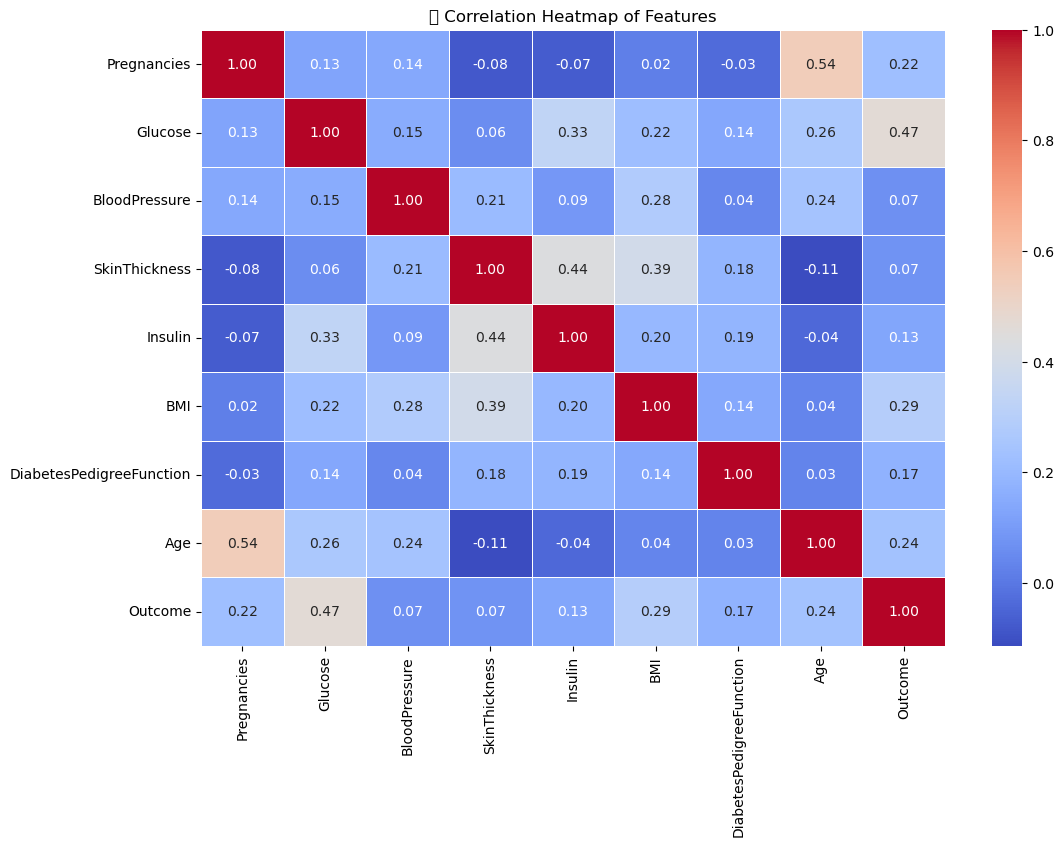

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is 'db'
plt.figure(figsize=(12, 8))
corr_matrix = db.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔍 Correlation Heatmap of Features")
plt.show()


In [7]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
db=db.drop(columns=['Insulin','BloodPressure','SkinThickness','DiabetesPedigreeFunction'],axis=1)

In [8]:
X=db.drop(columns="Outcome",axis=1)
y=db["Outcome"]

In [9]:
X

,Pregnancies,Glucose,BMI,Age
0,6,148,33.6,50
1,1,85,26.6,31
2,8,183,23.3,32
3,1,89,28.1,21
4,0,137,43.1,33
...,...,...,...,...
763,10,101,32.9,63
764,2,122,36.8,27
765,5,121,26.2,30
766,1,126,30.1,47


In [10]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

In [13]:
scaler.fit(X)

StandardScaler()

In [14]:
scaler_X=scaler.transform(X)

In [15]:
scaler_X

array([[ 0.63994726,  0.84832379,  0.20401277,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.68442195, -0.19067191],
       [ 1.23388019,  1.94372388, -1.10325546, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087, -0.73518964, -0.27575966],
       [-0.84488505,  0.1597866 , -0.24020459,  1.17073215],
       [-0.84488505, -0.8730192 , -0.20212881, -0.87137393]])

In [16]:
X=scaler_X
y=db["Outcome"]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [18]:
X_train.shape

(537, 4)

In [19]:
y_train.shape

(537,)

In [20]:
X_test.shape

(231, 4)

In [21]:
y_test.shape

(231,)

In [22]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [23]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}

In [24]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"📌 {name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))
    results.append((name, acc))

# 5. Display summary
print("\n📊 Accuracy Summary:")
pd.DataFrame(results, columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

📌 Logistic Regression Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.66      0.54      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

📌 Decision Tree Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       150
           1       0.51      0.54      0.52        81

    accuracy                           0.65       231
   macro avg       0.62      0.63      0.63       231
weighted avg       0.66      0.65      0.66       231

📌 Random Forest Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       150
           1       0.63      0.53      0.58        81

    accuracy                           0.73       231
   macro avg       0.70      

,Model,Accuracy
5,Naive Bayes,0.753247
0,Logistic Regression,0.740260
4,Support Vector Machine,0.735931
2,Random Forest,0.727273
3,K-Nearest Neighbors,0.714286
1,Decision Tree,0.653680


In [26]:
import pickle

l_model = LogisticRegression()
l_model.fit(X_train, y_train)


with open('Diabeties.pkl', 'wb') as f:
    pickle.dump(l_model, f)


print("✅ Pickle files saved: 'Diabeties.pkl' and 'Diabeties_scaler.pkl'")

✅ Pickle files saved: 'Diabeties.pkl' and 'Diabeties_scaler.pkl'


In [27]:

# Load the saved Random Forest model
with open('Diabeties.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Make predictions using the loaded model
y_pred = loaded_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Loaded Model Accuracy: {accuracy:.2f}")
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Loaded Model Accuracy: 0.77

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.70      0.58      0.64        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231

